### 신경망 연산 기본

In [1]:
import numpy as np

X = np.random.rand(10,2)
X

array([[0.56072198, 0.1642451 ],
       [0.697042  , 0.76023041],
       [0.81780103, 0.23735649],
       [0.53435074, 0.90193452],
       [0.99517461, 0.84116169],
       [0.29218262, 0.61265732],
       [0.10066718, 0.88595677],
       [0.07039819, 0.00448016],
       [0.38662742, 0.61598107],
       [0.79342542, 0.561246  ]])

In [2]:
W1 = np.random.rand(2,4)
W1

array([[0.44800455, 0.90757184, 0.20854743, 0.796043  ],
       [0.96910889, 0.15116446, 0.0503398 , 0.5794947 ]])

In [3]:
b1 = np.random.rand(4)
b1

array([0.872315  , 0.767914  , 0.94586721, 0.66314301])

In [4]:
H = np.matmul(X,W1) + b1
H

array([[1.28269239, 1.3016375 , 1.07107241, 1.20468099],
       [1.92133903, 1.5154495 , 1.12950338, 1.65856791],
       [1.46871787, 1.54600705, 1.128366  , 1.45169463],
       [1.98577932, 1.38921612, 1.10270789, 1.61117546],
       [2.13333502, 1.7982602 , 1.19575224, 1.94279354],
       [1.5969458 , 1.12570273, 1.0376422 , 1.25076462],
       [1.77600293, 0.99320187, 1.01145998, 1.25668567],
       [0.90819548, 0.83248266, 0.96077411, 0.72177923],
       [1.64247858, 1.2119206 , 1.05750574, 1.32787283],
       [1.77168168, 1.57284501, 1.13958706, 1.61998285]])

### 시그모이드 함수

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

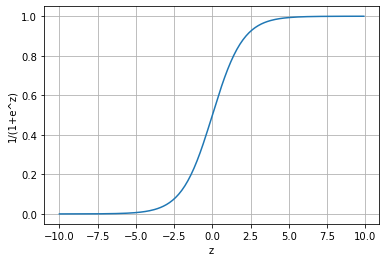

In [7]:
import matplotlib.pyplot as plt
zs = np.arange(-10,10,0.1)
gs = [sigmoid(z) for z in zs]
plt.plot(zs,gs)
plt.xlabel('z')  # z= -(XW + b)
plt.ylabel('1/(1+e^z)')
plt.grid(True)
plt.show()

In [8]:
# 1 layer logistic Regression(Binary Classification), 2진 분류
X = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)

a = np.matmul(X,W1) + b1
h = sigmoid(a)
h

array([[0.75884022, 0.66881294, 0.72688208, 0.63639425],
       [0.75593759, 0.6886441 , 0.72667928, 0.65763395],
       [0.82121419, 0.76122144, 0.76979102, 0.70111041],
       [0.78078006, 0.70305558, 0.7416113 , 0.66033369],
       [0.73460654, 0.66911886, 0.71372955, 0.64790292],
       [0.74751587, 0.68437247, 0.72177517, 0.65722379],
       [0.76715193, 0.71903515, 0.73509542, 0.68326679],
       [0.75564703, 0.69516384, 0.72698957, 0.66432366],
       [0.75622739, 0.7083567 , 0.72827406, 0.67737355],
       [0.77859723, 0.69162968, 0.73956135, 0.64972424]])

In [9]:
# 2 layers logistic Regression(Binary Classification)
X = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)

W2 = np.random.rand(4,3)
b2 = np.random.rand(3)

# layer1
a1 = np.matmul(X,W1) + b1   # (10,2) * (2,4) = (10,4)
s1 = sigmoid(a1)            # (10,4)

# layer2
a2 = np.matmul(s1,W2) + b2  # (10,4) * (4,3) = (10,3)
h = sigmoid(a2)             # (10,3)
h

array([[0.89490456, 0.94937478, 0.91582627],
       [0.89958087, 0.95566333, 0.92203776],
       [0.91010322, 0.95851027, 0.92888067],
       [0.90839722, 0.955187  , 0.92598151],
       [0.90333297, 0.95393335, 0.92273878],
       [0.90928441, 0.95667253, 0.92733043],
       [0.89149137, 0.94694422, 0.9126759 ],
       [0.91088216, 0.95878261, 0.92942776],
       [0.90256191, 0.95530914, 0.92322881],
       [0.89925734, 0.94968697, 0.91815136]])

### 계층을 클래스로 구현: 순전파 구현

In [10]:
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self,x):
        return 1 / (1 + np.exp(-x))

class Affine :  # 행렬의 내적을 아핀(Affine) 변환이라고 한다
    def __init__(self,W,b):
        self.params = [W,b]
        
    def forward(self,x):
        W,b = self.params
        out = np.dot(x,W) + b
        return out

In [15]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        I, H, O = input_size,hidden_size,output_size
        
        # Weight 과 bias 초기화
        W1 = np.random.rand(I,H)
        b1 = np.random.rand(H)
        
        W2 = np.random.rand(H,O)
        b2 = np.random.rand(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2),
            Sigmoid()
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

t = TwoLayerNet(2,4,3)        
t.params       

[array([[0.29308996, 0.88309815, 0.84478148, 0.31318565],
        [0.62346992, 0.26764205, 0.77659674, 0.72002671]]),
 array([0.03556427, 0.30749246, 0.99531552, 0.15952517]),
 array([[0.09293061, 0.09391392, 0.61074149],
        [0.68106127, 0.78511433, 0.37816113],
        [0.41861759, 0.68076228, 0.94473821],
        [0.9225518 , 0.37609502, 0.61367837]]),
 array([0.77461112, 0.19758731, 0.89009381])]

In [14]:
#  # 모든 가중치를 리스트에 모은다.
#         self.params = []
#         for layer in self.layers:
#             self.params += layer.params
# 위 코드 설명: 누적 덧셈
a = ['W1', 'b1']
a += ['W2', 'b2']
a

['W1', 'b1', 'W2', 'b2']

In [16]:
X = np.random.rand(10,2)
model = TwoLayerNet(2,4,3)
# 여기에서는 학습 수행 부분은 없음
# random 값을 그대로 가중치(파라메터)로 사용
s = model.predict(X)
print(s,s.shape)

[[0.8247934  0.83957556 0.88050407]
 [0.85253972 0.86502622 0.9049368 ]
 [0.85201929 0.86207832 0.90209186]
 [0.85211121 0.86375624 0.90371954]
 [0.8567592  0.8659086  0.90569563]
 [0.8645662  0.87293995 0.91226775]
 [0.8620595  0.87100127 0.91046591]
 [0.87071177 0.8777755  0.91674572]
 [0.86000335 0.86990246 0.90944959]
 [0.85659961 0.86820775 0.90789544]] (10, 3)


### MatMul 노드

In [17]:
class Matmul:
    def __init__(self,W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    # 순전파
    def forward(self,x):
        W, = self.params
        out = np.dot(x,W)
        self.x = x
        return out
    
    # 역전파
    def backward(self,dout):
        W, = self.params
        x = self.x
        dx = np.dot(dout,W.T)
        dW = np.dot(x.T,dout)
        self.grads[0][...] = dW   # 깊은 복사
        return dx

In [18]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a = b
print(a)
id(a) == id(b)

[4 5 6]


True

In [19]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a[...] = b 
print(a)
id(a) == id(b)

[4 5 6]


False

In [21]:
# np.zeros_like
a = np.arange(12).reshape(3,4)
b = np.zeros_like(a)
b

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

## 시그모이드 계층 : 역전파

In [22]:
class Sigmoid:
    def __init__(self):
        self.params,self.grads = [],[]
        self.out = None
        
    # 순전파    
    def forward(self,x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    # 역전파
    def backward(self,dout):
        dx = dout*self.out*(1 - self.out)  # y = sigmoid(x), y'= y*(1 - y) : sigmoid의 미분
        return dx

## Affine 계층 : 역전파

In [24]:
class Affine :  
    def __init__(self,W,b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W),np.zeros_like(b)]
        self.x = None
    
    # 순전파
    def forward(self,x):
        W,b = self.params
        out = np.dot(x,W) + b
        self.x = x
        return out
    
    # 역전파
    def backward(self,dout):
        W,b = self.params
        x = self.x
        dx = np.dot(dout,W.T)
        dW = np.dot(x.T,dout)
        db = np.sum(dout,axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx       

## Softmax with Loss 계층

In [25]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params,self.grads = [], []
        self.y = None    # softmax의 출력 값
        self.t = None    # 정답 레이블
        
    def softmax(self,x):
        if x.ndim == 2:
            x = x - x.max(axis=1, keepdims=True)
            x = np.exp(x)
            x /= x.sum(axis=1, keepdims=True)
        elif x.ndim == 1:
            x = x - np.max(x)
            x = np.exp(x) / np.sum(np.exp(x))
        return x 
    
    # https://smile2x.tistory.com/entry/softmax-crossentropy-%EC%97%90-%EB%8C%80%ED%95%98%EC%97%AC 
    def cross_entropy_error(self,y, t):  
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)

        # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
        if t.size == y.size:
            t = t.argmax(axis=1)

        batch_size = y.shape[0]

        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size  # 1e-7은 log(0)으로 무한대가 나오는걸 방지
          
    
    def forward(self, x, t):
        self.t = t
        self.y = self.softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = self.cross_entropy_error(self.y, self.t)
        return loss
     
    def backward(self,dout=1):
        batch_size = self.t.shape[0]

        # dx = (self.y - self.t)/batch_size # 순수 Softmax계층 일경우
        
        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size
        return dx

## 가중치 갱신

In [27]:
# 확률적 경사하강법(Stochastic Gradient Descent)
class SGD:
    def __init__(self,lr=0.01):
        self.lr = lr
    
    def update(self,params,grads):
        for i in range(len(params)):
            params[i] -= self.lr*grads[i]   

In [28]:
class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)
            
# https://dalpo0814.tistory.com/29